In [1]:
#importing pandas in Python with the pd alias
import pandas as pd
import chardet
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
#checking the encoding type of text file
with open('/Users/zarifmahmud/Downloads/Datasets/ikea_kommun_data.txt', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

ISO-8859-1


In [3]:
# Read the file into a pandas DataFrame
df = pd.read_table('/Users/zarifmahmud/Downloads/Datasets/ikea_kommun_data.txt', encoding='iso-8859-1')
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [5]:
#display all columns and their data types with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


In [6]:
df.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [7]:
pd.set_option("display.max.rows", None)
df

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0
8,125,2010,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0


In [8]:
# normalizing the data
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Perform PCA
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

In [9]:
#importing the K-means from sklearn
from sklearn.cluster import KMeans

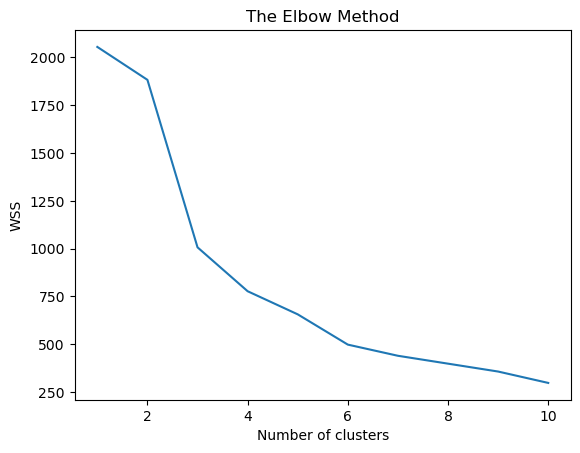

In [10]:
# Calculate the WSS(sum of square) for different values of k
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init='auto', random_state=0)
    kmeans.fit(pca_data)
    wss.append(kmeans.inertia_)

# Plot the WSS vs. number of clusters
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')

plt.show()



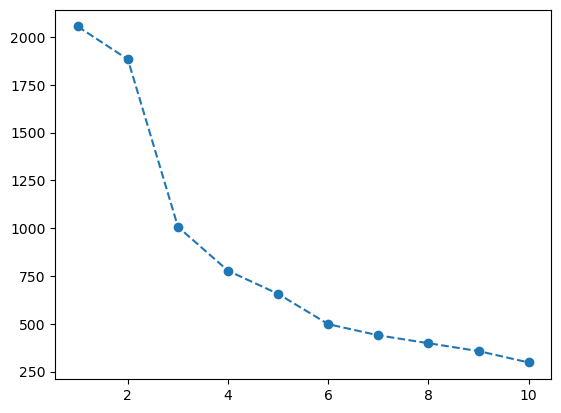

In [11]:
# verifying the number of cluster
plt.plot(range(1,11), wss, marker = 'o', linestyle = '--')

In [12]:
# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the k-means model to the PCA results
kmeans.fit(pca_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Print the cluster labels
print(labels)

[0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 2 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


/Users/zarifmahmud/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# create a new column for cluster labels in the original dataframe
df['Cluster_Labels'] = labels

In [14]:
# Explore the clusters
cluster_sizes = df.groupby('Cluster_Labels').size()
print(cluster_sizes)

Cluster_Labels
0    174
1     32
2      1
dtype: int64


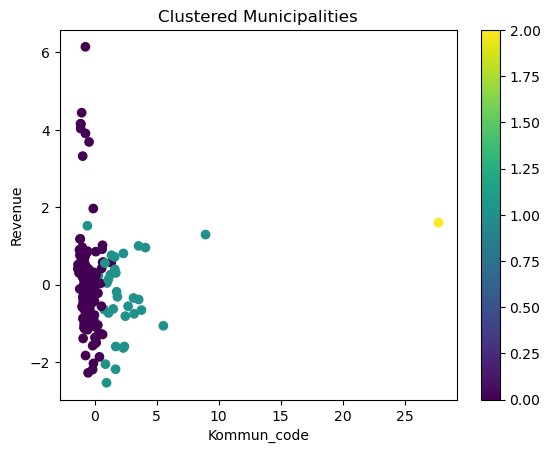

In [15]:
# create scatter plot of first two principal components colored by cluster label. Kommun_code(X axis) & Revenue(y-axis)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Kommun_code')
plt.ylabel('Revenue')
plt.title('Clustered Municipalities')
plt.colorbar()
plt.show()

In [16]:
# Create a list of municipalities that have IKEA stores
ikea_municipalities = ['Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg', 'Jönköping', 'Kalmar', 
                      'Karlstad', 'Linköping', 'Malmö', 'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala', 
                      'Västerås', 'Älmhult', 'Örebro']

# Add a new column "has_ikea" to the original dataframe
df['has_ikea'] = df['Kommun_name'].apply(lambda x: 1 if x in ikea_municipalities else 0)


In [17]:
#Checking the has_ikea value is it inserted correctly
len(df[df['has_ikea'] == 1])


12

In [18]:
# Filter the dataframe to only include municipalities without an IKEA store
no_ikea_df = df[df['has_ikea'] == 0]
no_ikea_df

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster_Labels,has_ikea
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,1,0
8,125,2010,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,1,0
10,127,2010,Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0,0,1,0
11,128,2010,Salem,27,68,15391,1900,0.123449,19.89888,2.782046,0,0,0,0
12,136,2010,Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0,0,0,0


In [19]:


# Group the dataframe by cluster labels and calculate the mean values for relevant features
cluster_means = no_ikea_df.groupby('Cluster_Labels')[['Population', 'SalesIndex', 'Revenue','Productivity' ]].mean()

# Sort the mean values in descending order and select the top 3 candidates
top_3_candidates = cluster_means.sort_values(by= ['Revenue'], ascending=False).head(3)


In [20]:
# Merge top_3_candidates with df on the 'Cluster_Labels' column
top_three_with_cluster_labels = pd.merge(top_3_candidates, no_ikea_df[['Cluster_Labels', 'Kommun_code', 'Kommun_name']], on='Cluster_Labels')
top_three_with_cluster_labels.head(3)

,Cluster_Labels,Population,SalesIndex,Revenue,Productivity,Kommun_code,Kommun_name
0,1,71487.541667,286.228773,2777.875,120.004155,123,Järfälla
1,1,71487.541667,286.228773,2777.875,120.004155,126,Huddinge
2,1,71487.541667,286.228773,2777.875,120.004155,127,Botkyrka
